<a href="https://colab.research.google.com/github/WenqiLiao/Underground_Utilities/blob/main/DelaunayTriangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Converting Shapefile Coordinates to Arrays

In [ ]:
import gdal
from osgeo import osr
from osgeo import ogr

def layer(shapefile):

    # 1) opening the shapefile
    source_ds = ogr.Open(shapefile)
    source_layer = source_ds.GetLayer()

    # 2) Creating the destination raster data source

    pixelWidth = pixelHeight = 1 # depending how fine you want your raster
    x_min, x_max, y_min, y_max = source_layer.GetExtent()
    cols = int((x_max - x_min) / pixelHeight)
    rows = int((y_max - y_min) / pixelWidth)
    target_ds = gdal.GetDriverByName('GTiff').Create(raster_path, cols, rows, 1, gdal.GDT_Byte)
    target_ds.SetGeoTransform((x_min, pixelWidth, 0, y_min, 0, pixelHeight))
    band = target_ds.GetRasterBand(1)
    NoData_value = 255
    band.SetNoDataValue(NoData_value)
    band.FlushCache()

    # 4) Instead of setting a general burn_value, use optionsand set it to the attribute that contains the relevant unique value ["ATTRIBUTE=ID"]
    gdal.RasterizeLayer(target_ds, [1], source_layer, options = ['ATTRIBUTE=surface'])

    # 5) Adding a spatial reference
    target_dsSRS = osr.SpatialReference()
    target_dsSRS.ImportFromEPSG(2975)
    target_ds.SetProjection(target_dsSRS.ExportToWkt())
    return gdal.Open(raster_path).ReadAsArray()


raster_path = 'C:/Users/path_to_the_rasterized_output/temp.tif'

shapefile = 'C:/Users/path_to_the_shapefile/shapefile_maido_tipe.shp'

print layer(shapefile)

TypeError: ignored

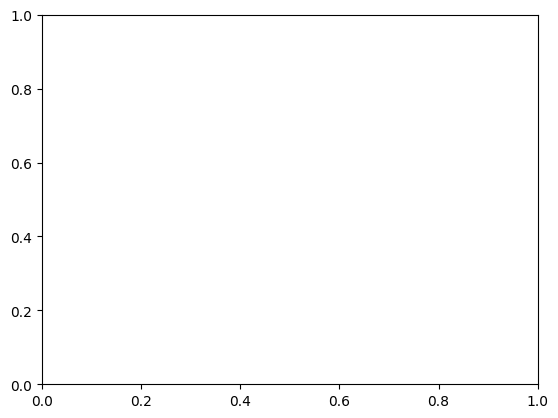

In [ ]:
import geopandas as gpd
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Step 1: Read the Shapefile
shapefile_path = "/content/hydrant_location.shp"
gdf = gpd.read_file(shapefile_path)

# Step 2: Extract Points
points = gdf.geometry.apply(lambda geom: (geom.x, geom.y)).tolist()

# Step 3: Perform Delaunay Triangulation
tri = Delaunay(points)

# Step 4: Visualize the Triangulation (Optional)
plt.triplot(100, 100, tri)
# plt.plot(points[:,0], points[:,1], 'o')
plt.show()
# plt.triplot(points[:, 0], points[:, 1], triangulation.simplices)
# plt.plot(points[:, 0], points[:, 1], 'o')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Delaunay Triangulation')
# plt.show()


Successful Attempt!

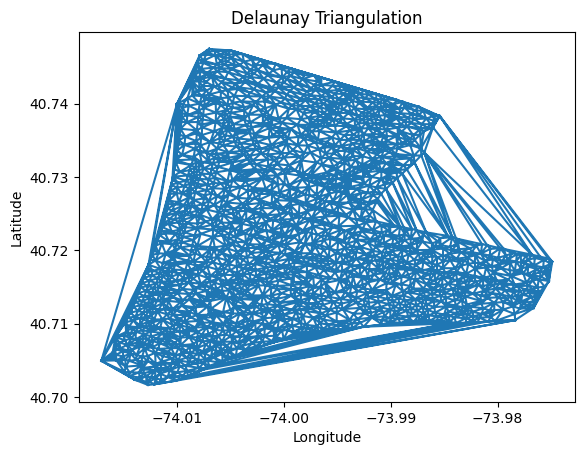

In [5]:
import geopandas as gpd
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Step 1: Read the Shapefile
shapefile_path = "/content/hydrant_location.shp"
gdf = gpd.read_file(shapefile_path)


# Step 2: Extract Points
points = np.array(gdf.geometry.apply(lambda geom: (geom.x, geom.y)).tolist())

# Step 3: Perform Delaunay Triangulation
triangulation = Delaunay(points)



# Step 4: Optional - Visualize the Triangulation
plt.triplot(points[:, 0], points[:, 1], triangulation.simplices)
# plt.plot(points[:, 0], points[:, 1], 'o')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Delaunay Triangulation')
plt.show()


In [9]:
triangulation
# print(triangulation.simplices)
print(points[triangulation.simplices])

[[[-74.01266545  40.71804151]
  [-74.01000033  40.73996157]
  [-74.01707923  40.7049406 ]]

 [[-74.01266545  40.71804151]
  [-74.0131101   40.71625166]
  [-74.01293505  40.71691537]]

 [[-74.0131101   40.71625166]
  [-74.01239491  40.71655122]
  [-74.01293505  40.71691537]]

 ...

 [[-74.0048326   40.71329036]
  [-74.00463694  40.71232987]
  [-74.00448279  40.7124603 ]]

 [[-74.01157825  40.70319418]
  [-74.0119746   40.70254321]
  [-74.01143068  40.70235232]]

 [[-74.01157825  40.70319418]
  [-74.01203077  40.70275664]
  [-74.0119746   40.70254321]]]


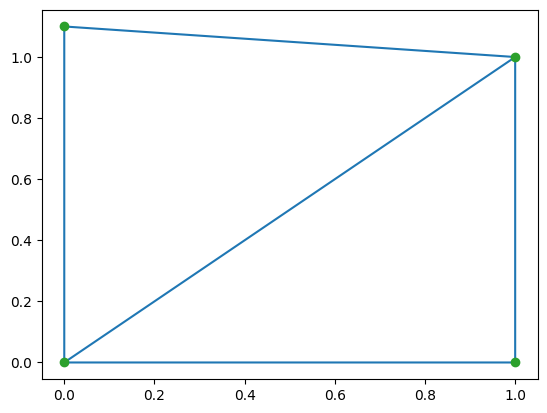

In [ ]:
import numpy as np
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
from scipy.spatial import Delaunay
tri = Delaunay(points)

import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()
